# scikit-learn tutorial
...

First, load some necessary libraries

In [1]:
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline

## Explore a dataset

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

In [3]:
print digits.DESCR

 Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is 

In [4]:
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [5]:
digits.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [6]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
digits.images

array([[[  0.,   0.,   5., ...,   1.,   0.,   0.],
        [  0.,   0.,  13., ...,  15.,   5.,   0.],
        [  0.,   3.,  15., ...,  11.,   8.,   0.],
        ..., 
        [  0.,   4.,  11., ...,  12.,   7.,   0.],
        [  0.,   2.,  14., ...,  12.,   0.,   0.],
        [  0.,   0.,   6., ...,   0.,   0.,   0.]],

       [[  0.,   0.,   0., ...,   5.,   0.,   0.],
        [  0.,   0.,   0., ...,   9.,   0.,   0.],
        [  0.,   0.,   3., ...,   6.,   0.,   0.],
        ..., 
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   0., ...,  10.,   0.,   0.]],

       [[  0.,   0.,   0., ...,  12.,   0.,   0.],
        [  0.,   0.,   3., ...,  14.,   0.,   0.],
        [  0.,   0.,   8., ...,  16.,   0.,   0.],
        ..., 
        [  0.,   9.,  16., ...,   0.,   0.,   0.],
        [  0.,   3.,  13., ...,  11.,   5.,   0.],
        [  0.,   0.,   0., ...,  16.,   9.,   0.]],

       ..., 
       [[  0.,   0., 

In [8]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

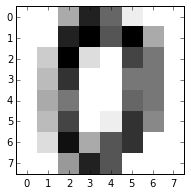

In [9]:
plt.figure(1, figsize=(3,3))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

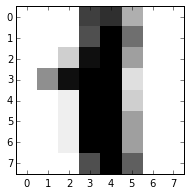

In [10]:
plt.figure(1, figsize=(3,3))
plt.imshow(digits.images[1], cmap=plt.cm.gray_r, interpolation='nearest')

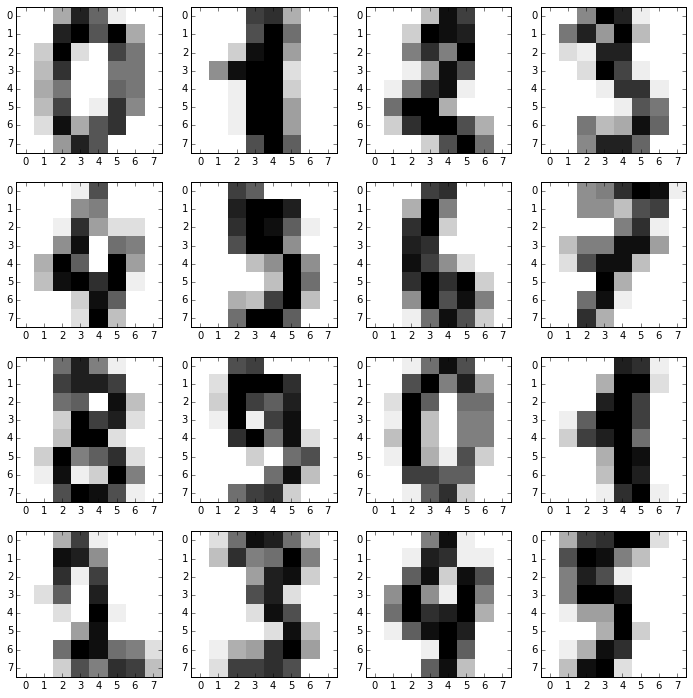

In [11]:
num_x, num_y = (4,4)
total = num_x*num_y
fig, axes = plt.subplots(num_y, num_x, figsize=(3*num_y,3*num_x))
a = axes[0,0]

import itertools
for x_it, y_it in itertools.product(xrange(num_x), xrange(num_y)):
    img_index = num_y*y_it + x_it
    axes[y_it, x_it].imshow(digits.images[img_index],
                            cmap=plt.cm.gray_r,
                            interpolation='nearest')

## Learning and predicting

In [12]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=1000.)

In [13]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

In [14]:
clf.predict(digits.data[-1])

array([8])

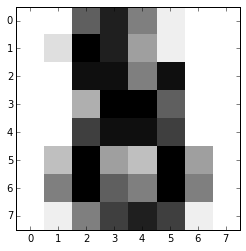

In [15]:
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')

In [16]:
digits.target[-1]

8

## Making the model persistent
We can do this using a pickle

In [17]:
X, y = iris.data, iris.target
clf = svm.SVC()
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [18]:
import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)
clf2.predict(X[0])[0]

0

In [19]:
y[0]

0

For large datasets, it is often useful to use the joblib replacement of pickle.

In [20]:
from sklearn.externals import joblib
joblib.dump(clf, 'filename.pkl')

['filename.pkl',
 'filename.pkl_01.npy',
 'filename.pkl_02.npy',
 'filename.pkl_03.npy',
 'filename.pkl_04.npy',
 'filename.pkl_05.npy',
 'filename.pkl_06.npy',
 'filename.pkl_07.npy',
 'filename.pkl_08.npy',
 'filename.pkl_09.npy',
 'filename.pkl_10.npy']

In [21]:
clf3 = joblib.load('filename.pkl')
clf3.predict(X[0])[0]

0